# 1. Introduction to imbalanced classes problem
Any real world dataset may come along with several problems. The problem of imbalanced class is one of them. The problem of imbalanced classes arises when one set of classes dominate over another set of classes. The former is called majority class while the latter is called minority class. It causes the machine learning model to be more biased towards majority class. It causes poor classification of minority classes. Hence, this problem throw the question of “accuracy” out of question. This is a very common problem in machine learning where we have datasets with a disproportionate ratio of observations in each class.

Imbalanced classes problem is one of the major problems in the field of data science and machine learning. It is very important that we should properly deal with this problem and develop our machine learning model accordingly. If this not done, then we may end up with higher accuracy. But this higher accuracy is meaningless because it comes from a meaningless metric which is not suitable for the dataset in question. Hence, this higher accuracy no longer reliably measures model performance

# 2. Problems with imbalanced learning
The problem of imbalanced classes is very common and it is bound to happen. For example, in the above example the number of patients who do not have the rare disease is much larger than the number of patients who have the rare disease. So, the model does not correctly classify the patients who have the rare disease. This is where the problem arises.

The problem of learning from imbalanced data have new and modern approaches. This learning from imbalanced data is referred to as imbalanced learning.

Significant problems may arise with imbalanced learning. These are as follows:-

The class distribution is skewed when the dataset has underrepresented data.

The high level of accuracy is simply misleading. In the previous example, it is high because most patients do not have the disease not because of the good model.

There may be inherent complex characteristics in the dataset. Imbalanced learning from such dataset requires new approaches, principles, tools and techniques. But, it cannot guarantee an efficient solution to the business problem.

# 3. Example of imbalanced classes
The problem of imbalanced classes may appear in many areas including the following:-

Disease detection

Fraud detection

Spam filtering

Earthquake prediction

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [95]:
df=df.sample(frac=0.2) #huge dataset so taking fraction of dataset to save computational time

In [45]:
# check shape of dataset

df.shape

(22785, 31)

In [46]:
# preview of the dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257703,158302.0,-1.906249,2.259575,-3.456809,-1.555935,1.694769,2.968648,-1.070086,2.655979,-0.264319,...,-0.259470,-1.014989,0.364631,0.578321,-0.172432,0.188096,0.069366,-0.006161,11.70,0
2834,2410.0,-1.734055,-0.084187,2.985237,3.432625,-1.020158,1.691794,-1.135961,1.163563,-0.165846,...,0.291366,0.865254,-0.111067,0.078588,0.332259,0.544855,0.272806,-0.015664,121.34,0
208669,137220.0,0.459662,-2.535917,-1.182858,1.692314,-0.945725,0.366771,0.533472,-0.089842,0.428568,...,0.367569,-0.591152,-0.378707,-0.574400,-0.636782,-1.000599,-0.086585,0.095224,771.00,0
216189,140377.0,-0.819644,0.829103,-0.435507,-0.284238,1.083888,0.199969,-0.727497,-2.257741,0.059435,...,2.122966,-0.968696,-0.006396,0.202111,-0.039022,0.472202,0.178777,-0.137307,18.29,0
263803,161120.0,1.722953,-1.465938,-0.834453,-0.258975,-1.229830,-0.598277,-0.522412,-0.106907,-0.367978,...,-0.198811,-0.437173,0.137981,0.070362,-0.507368,0.515156,-0.074890,-0.028824,199.24,0


In [47]:
# check the distribution of Class column

df['Class'].value_counts()

0    22748
1       37
Name: Class, dtype: int64

So, we have 37 fraudulent transactions out of total 22748 transactions in the dataset. The Class column takes value 1 for fraudulent transactions and 0 for non-fraudulent transactions.

In [49]:
# percentage of labels within the Class column

percentage_labels = df['Class'].value_counts() / len(df)
print(percentage_labels)

0    0.998376
1    0.001624
Name: Class, dtype: float64


We can see that the Class column is highly imbalanced. It contains 99.83% labels as very less values in class 1 

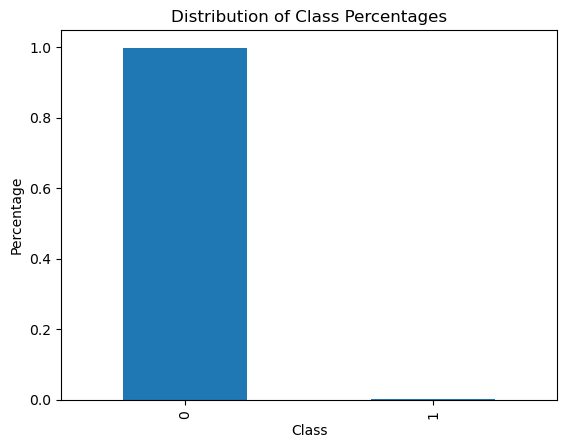

In [50]:
import numpy as np
import matplotlib.pyplot as plt

(df['Class'].value_counts() / len(df)).plot.bar() # percentage of labels within the Class column

plt.title('Distribution of Class Percentages')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

#  Misleading accuracy for imbalanced classes
Now, I will demonstrate that accuracy is misleading for imbalanced classes. Most of the machine learning algorithms are designed to maximize the overall accuracy by default. But this maximum accuracy is misleading. We can confirm this with the following analysis.

I will fit a very simple Logistic Regression model using the default settings. I will train the classifier on the imbalanced dataset.

In [51]:
# declare feature vector and target variable

X = df.drop(['Class'], axis=1)
y = df['Class']

In [52]:
# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression


# instantiate the Logistic Regression classifier
logreg = LogisticRegression()


# fit the classifier to the imbalanced data
clf = logreg.fit(X, y)


# predict on the training data
y_pred = clf.predict(X)

In [53]:
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 99.93%


# Accuracy problem 

Thus, our Logistic Regression model for credit card fraud detection has an accuracy of 99.93%. It means that for each 100 transactions it classified, 99.83% were classified as genuine.

It does not mean that our model performance is excellent. I have previously shown that our dataset have 99.82% genuine transactions and 0.01% fraudulent transactions. Our Logistic Regression classifier predicted all transactions as genuine. Then we have a accuracy of 99.83% because it correctly classified 99.93% transactions as genuine.

Thus, this algorithm is 99.93% accurate. But it was horrible at classifying fraudulent transactions. So, we should have other ways to measure the model performance. 

In [54]:
# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)


print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[22740     8]
 [    9    28]]


In [55]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22748
           1       0.78      0.76      0.77        37

    accuracy                           1.00     22785
   macro avg       0.89      0.88      0.88     22785
weighted avg       1.00      1.00      1.00     22785



# Precision - Recall Curve
Another tool to measure the classification model performance is Precision-Recall Curve. It is a useful metric which is used to evaluate a classifier model performance when classes are very imbalanced such as in this case. This Precision-Recall Curve shows the trade off between precision and recall.

In a Precision-Recall Curve, we plot Precision against Recall.

Precision is defined as the ratio of TP to (TP + FP).

Recall is defined as the ratio of TP to (TP + FN).

The Precision Recall Area Under Curve (PR AUC) is the area under the PR curve. The higher it is, the better the model is.

In [56]:
# compute and print average precision score

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_pred, y)

print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.59


Precision-Recall Curve gives us the correct accuracy in this imbalanced dataset case. We can see that we have a very poor accuracy for the model.

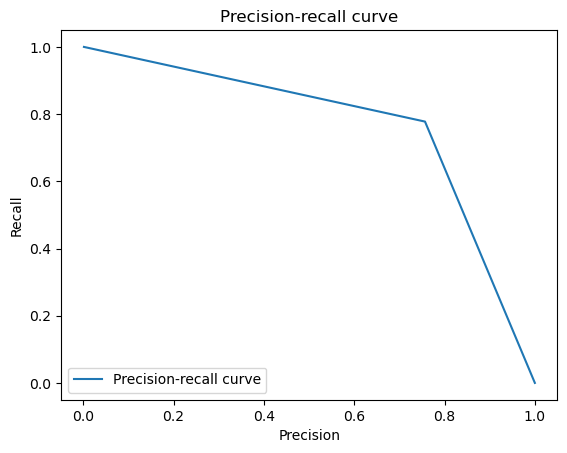

In [57]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_pred, y)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

# Random over-sampling the minority class
Over-sampling is the process of randomly duplicating observations from the minority class in order to achieve a balanced dataset. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.

As you can notice, we improved Recall a lot, but in order to do that we sacrifice Precision
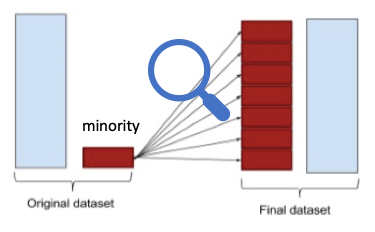

In [58]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Separate the minority and majority classes
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)

# Resample the minority class
X_resampled, y_resampled = oversampler.fit_resample(df.drop('Class', axis=1), df['Class'])

# Combine majority class with oversampled minority class
df_oversampled= pd.concat([pd.DataFrame(X_resampled, columns=df.columns[:-1]), pd.Series(y_resampled, name='Class')], axis=1)

# Display new class value counts
print(df_oversampled['Class'].value_counts())


0    22748
1    22748
Name: Class, dtype: int64


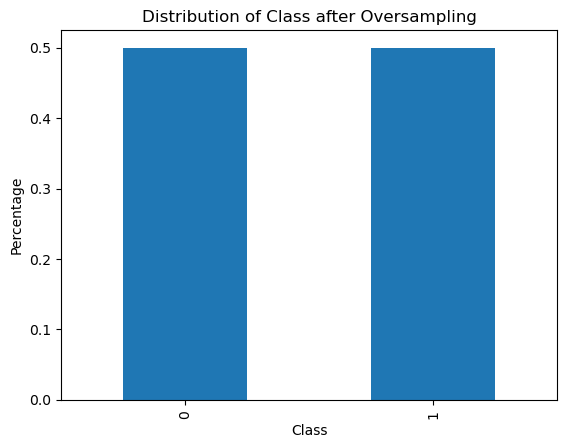

In [59]:
(df_oversampled['Class'].value_counts() / len(df_oversampled)).plot.bar()

plt.title('Distribution of Class after Oversampling')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

In [60]:
# declare feature vector and target variable
X1 = df_oversampled.drop(['Class'], axis=1)
y1 = df_oversampled['Class']


# instantiate the Logistic Regression classifier
logreg1 = LogisticRegression()


# fit the classifier to the imbalanced data
clf1 = logreg1.fit(X1, y1)


# predict on the training data
y1_pred = clf1.predict(X1)


# print the accuracy
accuracy1 = accuracy_score(y1_pred, y1)

print("Accuracy : %.2f%%" % (accuracy1 * 100.0))

Accuracy : 94.97%


We now have a balanced dataset. Although the accuracy is slightly decreased, but it is still quite high and acceptable. This accuracy is more meaningful as a performance metric.

In [61]:
# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y1, y1_pred)


print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[21677  1071]
 [ 1218 21530]]


In [62]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y1, y1_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95     22748
           1       0.95      0.95      0.95     22748

    accuracy                           0.95     45496
   macro avg       0.95      0.95      0.95     45496
weighted avg       0.95      0.95      0.95     45496



In [63]:
# compute and print average precision score

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y1_pred, y1)

print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.93


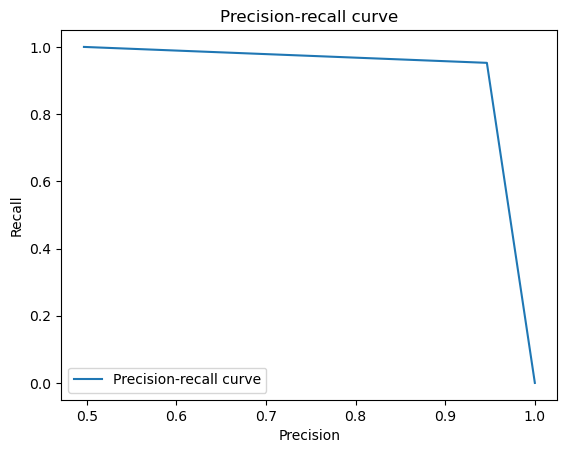

In [64]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y1_pred, y1)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

# Random under-sampling the majority class
The under-sampling methods work with the majority class. In these methods, we randomly eliminate instances of the majority class. It reduces the number of observations from majority class to make the dataset balanced. This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.
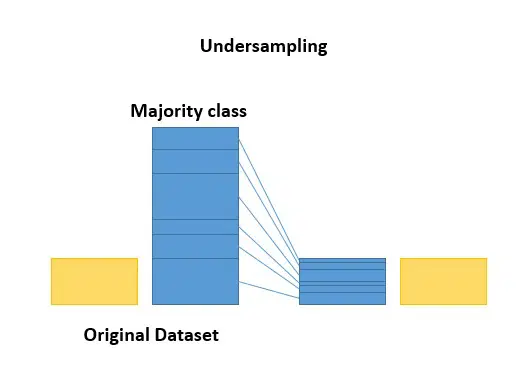

In [65]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Separate the minority and majority classes
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=0)

# Resample the majority class
X_undersampled, y_undersampled = undersampler.fit_resample(df.drop('Class', axis=1), df['Class'])

# Create a DataFrame with the undersampled data
df_undersampled = pd.concat([pd.DataFrame(X_undersampled, columns=df.columns[:-1]), pd.Series(y_undersampled, name='Class')], axis=1)

# Display new class value counts
print(df_undersampled['Class'].value_counts())


0    37
1    37
Name: Class, dtype: int64


In [66]:
# declare feature vector and target variable
X2 = df_undersampled.drop(['Class'], axis=1)
y2 = df_undersampled['Class']


# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression()


# fit the classifier to the imbalanced data
clf2 = logreg2.fit(X2, y2)


# predict on the training data
y2_pred = clf2.predict(X2)


# print the accuracy
accuracy2 = accuracy_score(y2_pred, y2)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))

Accuracy : 100.00%


In [67]:
# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y2, y2_pred)


print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[37  0]
 [ 0 37]]


In [68]:
# compute and print average precision score

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y2_pred, y2)

print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 1.00


In [69]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y2, y2_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



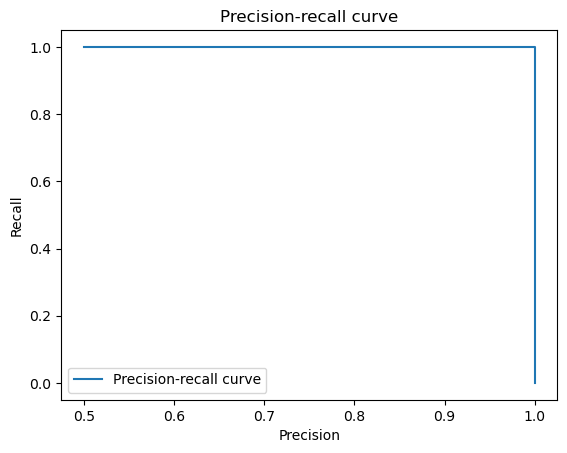

In [70]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y2_pred, y2)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

# Over-sampling : SMOTE
In the context of synthetic data generation, there is a powerful and widely used method known as synthetic minority oversampling technique or SMOTE. Under this technique, artificial data is created based on feature space. Artificial data is generated with bootstrapping and k-nearest neighbours algorithm. It works as follows:-

First of all, we take the difference between the feature vector (sample) under consideration and its nearest neighbour.

Then we multiply this difference by a random number between 0 and 1.

Then we add this number to the feature vector under consideration.

Thus we select a random point along the line segment between two specific features.

The concept of SMOTE can best be illustrated with the following figure:-

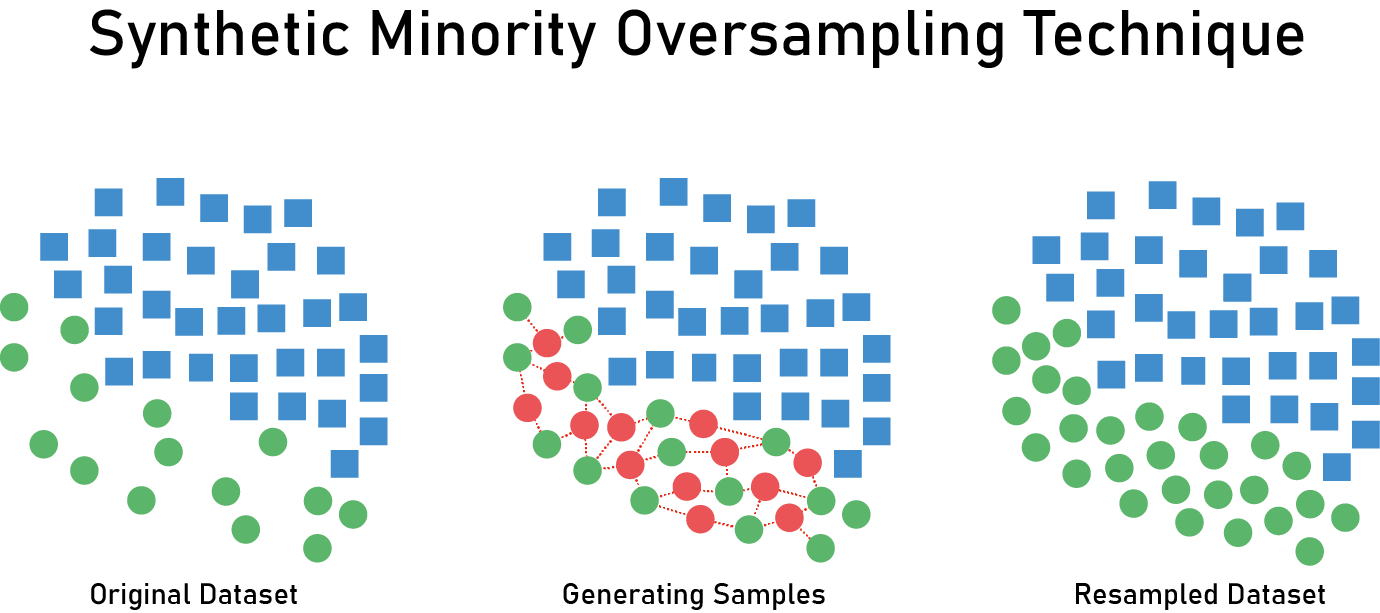

In [71]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate the minority and majority classes
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=0)

# Resample the minority class using SMOTE
X_smote, y_smote = smote.fit_resample(df.drop('Class', axis=1), df['Class'])

# Create a DataFrame with the oversampled data
df_smote = pd.concat([pd.DataFrame(X_smote, columns=df.columns[:-1]), pd.Series(y_smote, name='Class')], axis=1)

# Display new class value counts
print(df_smote['Class'].value_counts())


0    22748
1    22748
Name: Class, dtype: int64


In [72]:
# declare feature vector and target variable
X3 = df_smote.drop(['Class'], axis=1)
y3 = df_smote['Class']


# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression()


# fit the classifier to the imbalanced data
clf2 = logreg2.fit(X3, y3)


# predict on the training data
y3_pred = clf2.predict(X3)


# print the accuracy
accuracy2 = accuracy_score(y3_pred, y3)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))

Accuracy : 98.06%


In [73]:
# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y3, y3_pred)


print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[22298   450]
 [  433 22315]]


In [74]:
# compute and print average precision score

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y3_pred, y3)

print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.97


In [75]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y3,y3_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22748
           1       0.98      0.98      0.98     22748

    accuracy                           0.98     45496
   macro avg       0.98      0.98      0.98     45496
weighted avg       0.98      0.98      0.98     45496



# Ensemble techniques with original data

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']



In [77]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257703,158302.0,-1.906249,2.259575,-3.456809,-1.555935,1.694769,2.968648,-1.070086,2.655979,-0.264319,...,-0.259470,-1.014989,0.364631,0.578321,-0.172432,0.188096,0.069366,-0.006161,11.70,0
2834,2410.0,-1.734055,-0.084187,2.985237,3.432625,-1.020158,1.691794,-1.135961,1.163563,-0.165846,...,0.291366,0.865254,-0.111067,0.078588,0.332259,0.544855,0.272806,-0.015664,121.34,0
208669,137220.0,0.459662,-2.535917,-1.182858,1.692314,-0.945725,0.366771,0.533472,-0.089842,0.428568,...,0.367569,-0.591152,-0.378707,-0.574400,-0.636782,-1.000599,-0.086585,0.095224,771.00,0
216189,140377.0,-0.819644,0.829103,-0.435507,-0.284238,1.083888,0.199969,-0.727497,-2.257741,0.059435,...,2.122966,-0.968696,-0.006396,0.202111,-0.039022,0.472202,0.178777,-0.137307,18.29,0
263803,161120.0,1.722953,-1.465938,-0.834453,-0.258975,-1.229830,-0.598277,-0.522412,-0.106907,-0.367978,...,-0.198811,-0.437173,0.137981,0.070362,-0.507368,0.515156,-0.074890,-0.028824,199.24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195097,130892.0,0.269679,0.652613,-1.086849,-0.635080,1.394839,-1.029451,1.481340,-0.340027,-0.311847,...,0.084287,0.315950,-0.218836,0.676535,0.026629,0.677138,-0.263213,-0.234792,26.57,0
85575,60834.0,-0.995232,-1.037916,1.168053,-2.371135,-1.173507,0.535706,0.946853,0.312711,1.586281,...,0.184270,0.208864,0.690024,-0.327896,-0.522821,-0.376065,0.086032,0.183944,313.31,0
107710,70572.0,1.460089,-0.885798,0.169214,-1.608999,-0.911790,-0.191359,-0.806631,-0.029261,-2.395621,...,-0.580077,-1.346965,0.259121,-0.373677,0.046617,-0.611560,0.033227,0.009572,16.40,0
131073,79494.0,0.947470,-0.751206,1.326642,1.636934,-0.948153,1.448340,-1.077627,0.546267,1.899620,...,-0.057636,0.150723,-0.230553,-0.747354,0.533021,-0.148206,0.102614,0.038899,90.60,0


In [78]:
numerical_cols = X.select_dtypes('number').columns

# Creating a new DataFrame with only numerical columns
X_numerical = X[numerical_cols]

# Applying MinMax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Creating a new DataFrame with scaled numerical columns
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Displaying the scaled DataFrame
X_scaled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.916161,0.903074,0.759617,0.797897,0.223647,0.584107,0.560026,0.381742,0.767779,0.479258,...,0.432334,0.598563,0.391004,0.693603,0.520653,0.534429,0.375559,0.388850,0.532247,0.000906
1,0.013862,0.906960,0.724236,0.972086,0.512655,0.547936,0.531306,0.380663,0.746190,0.484984,...,0.447676,0.613132,0.529568,0.684693,0.444198,0.575670,0.450637,0.400085,0.531721,0.009398
2,0.794139,0.956459,0.687226,0.859383,0.411831,0.548928,0.501502,0.408007,0.728059,0.519545,...,0.462103,0.615148,0.422239,0.679680,0.344298,0.496485,0.125403,0.380237,0.537861,0.059717
3,0.812412,0.927593,0.738023,0.879591,0.297322,0.575968,0.497750,0.387353,0.696699,0.498082,...,0.416015,0.661578,0.394416,0.686653,0.463096,0.545331,0.435348,0.394892,0.524985,0.001417
4,0.932472,0.984964,0.703378,0.868804,0.298785,0.545143,0.479795,0.390712,0.727812,0.473231,...,0.427333,0.600167,0.433586,0.689358,0.442940,0.507060,0.444387,0.380883,0.530992,0.015432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22780,0.757513,0.952172,0.735359,0.861979,0.276996,0.580111,0.470097,0.423532,0.724440,0.476495,...,0.429753,0.607655,0.489088,0.682674,0.535679,0.550695,0.478476,0.370483,0.519587,0.002058
22781,0.352019,0.923631,0.709839,0.922951,0.176420,0.545893,0.505302,0.414777,0.733882,0.586858,...,0.441553,0.610300,0.481196,0.699698,0.382010,0.505797,0.256834,0.389770,0.542774,0.024267
22782,0.408382,0.979033,0.712136,0.895943,0.220573,0.549380,0.488948,0.386057,0.728935,0.355338,...,0.426172,0.590082,0.366539,0.691627,0.375006,0.552329,0.207275,0.386854,0.533118,0.001270
22783,0.460022,0.967466,0.714167,0.927239,0.408623,0.548896,0.525830,0.381619,0.737261,0.605076,...,0.431151,0.603901,0.476911,0.682455,0.317837,0.592075,0.304786,0.390686,0.534742,0.007017


In [81]:
x=X_scaled_df
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.916161,0.903074,0.759617,0.797897,0.223647,0.584107,0.560026,0.381742,0.767779,0.479258,...,0.432334,0.598563,0.391004,0.693603,0.520653,0.534429,0.375559,0.388850,0.532247,0.000906
1,0.013862,0.906960,0.724236,0.972086,0.512655,0.547936,0.531306,0.380663,0.746190,0.484984,...,0.447676,0.613132,0.529568,0.684693,0.444198,0.575670,0.450637,0.400085,0.531721,0.009398
2,0.794139,0.956459,0.687226,0.859383,0.411831,0.548928,0.501502,0.408007,0.728059,0.519545,...,0.462103,0.615148,0.422239,0.679680,0.344298,0.496485,0.125403,0.380237,0.537861,0.059717
3,0.812412,0.927593,0.738023,0.879591,0.297322,0.575968,0.497750,0.387353,0.696699,0.498082,...,0.416015,0.661578,0.394416,0.686653,0.463096,0.545331,0.435348,0.394892,0.524985,0.001417
4,0.932472,0.984964,0.703378,0.868804,0.298785,0.545143,0.479795,0.390712,0.727812,0.473231,...,0.427333,0.600167,0.433586,0.689358,0.442940,0.507060,0.444387,0.380883,0.530992,0.015432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22780,0.757513,0.952172,0.735359,0.861979,0.276996,0.580111,0.470097,0.423532,0.724440,0.476495,...,0.429753,0.607655,0.489088,0.682674,0.535679,0.550695,0.478476,0.370483,0.519587,0.002058
22781,0.352019,0.923631,0.709839,0.922951,0.176420,0.545893,0.505302,0.414777,0.733882,0.586858,...,0.441553,0.610300,0.481196,0.699698,0.382010,0.505797,0.256834,0.389770,0.542774,0.024267
22782,0.408382,0.979033,0.712136,0.895943,0.220573,0.549380,0.488948,0.386057,0.728935,0.355338,...,0.426172,0.590082,0.366539,0.691627,0.375006,0.552329,0.207275,0.386854,0.533118,0.001270
22783,0.460022,0.967466,0.714167,0.927239,0.408623,0.548896,0.525830,0.381619,0.737261,0.605076,...,0.431151,0.603901,0.476911,0.682455,0.317837,0.592075,0.304786,0.390686,0.534742,0.007017


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=42)

# Ensemble without blancing the data 

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Stacking': StackingClassifier(classifiers=[
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ],
    meta_classifier=LogisticRegression(solver='liblinear'),
    use_probas=True, average_probas=False),
    'Voting': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier()),
        ('GradientBoosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', XGBClassifier())
    ])
}

param_ranges = {
    'RandomForest': {
        'n_estimators': range(10, 201),
        'max_depth': [None] + list(range(10, 31)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9),
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9)
    },
    'AdaBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'XGBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': range(1, 9),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'Stacking': {
        'meta_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'use_probas': [True],
        'average_probas': [False]
    },
    'Voting': {
        'voting': ['hard', 'soft']
    }
}

results_df = pd.DataFrame(columns=['Model', 'AUC_train', 'AUC_test', 'F1_train', 'F1_test', 'Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test'])

for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_ranges[model_name],
                                       n_iter=10, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5),
                                       random_state=42, verbose=2)

    random_search.fit(x_train, y_train)

    best_params = random_search.best_params_

    print(best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(x_train, y_train)

    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)

    auc_train = roc_auc_score(y_train, best_model.predict_proba(x_train)[:, 1])
    auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)

    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results_df = results_df.append({'Model': model_name,
                                    'AUC_train': auc_train, 'AUC_test': auc_test,
                                    'F1_train': f1_train, 'F1_test': f1_test,
                                    'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test,
                                    'Precision_train': precision_train, 'Precision_test': precision_test,
                                    'Recall_train': recall_train, 'Recall_test': recall_test}, ignore_index=True)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 18, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_depth': 13, 'bootstrap': True}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 71, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_depth': 10, 'learning_rate': 0.01}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 176, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1.0, 'n_estimators': 110, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'use_probas': True, 'meta_classifier__C': 100, 'average_probas': False}
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'voting': 'soft'}


In [87]:
results_df


,Model,AUC_train,AUC_test,F1_train,F1_test,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test
0,RandomForest,0.999762,0.999322,0.784314,0.250000,0.999356,0.998947,0.952381,1.00,0.666667,0.142857
1,GradientBoosting,0.999989,0.998996,0.846154,0.250000,0.999532,0.998947,1.000000,1.00,0.733333,0.142857
2,AdaBoost,1.000000,0.984158,1.000000,0.545455,1.000000,0.999122,1.000000,0.75,1.000000,0.428571
3,XGBoost,0.999749,0.986970,0.877193,0.545455,0.999590,0.999122,0.925926,0.75,0.833333,0.428571
4,Stacking,1.000000,0.985689,1.000000,0.222222,1.000000,0.998771,1.000000,0.50,1.000000,0.142857
5,Voting,1.000000,0.970424,1.000000,0.222222,1.000000,0.998771,1.000000,0.50,1.000000,0.142857


# Ensemble with oversampling 

In [88]:
oversampler = RandomOverSampler(random_state=42)
x_train_oversampled, y_train_oversampled = oversampler.fit_resample(x_train, y_train)

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Stacking': StackingClassifier(classifiers=[
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ],
    meta_classifier=LogisticRegression(solver='liblinear'),
    use_probas=True, average_probas=False),
    'Voting': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier()),
        ('GradientBoosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', XGBClassifier())
    ])
}

param_ranges = {
    'RandomForest': {
        'n_estimators': range(10, 201),
        'max_depth': [None] + list(range(10, 31)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9),
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9)
    },
    'AdaBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'XGBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': range(1, 9),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'Stacking': {
        'meta_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'use_probas': [True],
        'average_probas': [False]
    },
    'Voting': {
        'voting': ['hard', 'soft']
    }
}

results_df_oversampled = pd.DataFrame(columns=['Model', 'AUC_train', 'AUC_test', 'F1_train', 'F1_test', 'Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test'])

for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_ranges[model_name],
                                       n_iter=10, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5),
                                       random_state=42, verbose=2)

    random_search.fit(x_train_oversampled, y_train_oversampled)

    best_params = random_search.best_params_

    print(best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(x_train_oversampled, y_train_oversampled)

    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)

    auc_train = roc_auc_score(y_train, best_model.predict_proba(x_train)[:, 1])
    auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)

    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results_df_oversampled = results_df_oversampled.append({'Model': model_name,
                                                            'AUC_train': auc_train, 'AUC_test': auc_test,
                                                            'F1_train': f1_train, 'F1_test': f1_test,
                                                            'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test,
                                                            'Precision_train': precision_train, 'Precision_test': precision_test,
                                                            'Recall_train': recall_train, 'Recall_test': recall_test}, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 110, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_depth': 13, 'bootstrap': True}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 192, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 3, 'learning_rate': 0.2}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 152, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1.0, 'n_estimators': 110, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'use_probas': True, 'meta_classifier__C': 0.001, 'average_probas': False}
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'voting': 'soft'}


In [89]:
 results_df_oversampled

,Model,AUC_train,AUC_test,F1_train,F1_test,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test
0,RandomForest,1.0,0.998544,0.983607,0.600000,0.999941,0.999298,0.967742,1.000000,1.0,0.428571
1,GradientBoosting,1.0,0.879086,1.000000,0.666667,1.000000,0.999298,1.000000,0.800000,1.0,0.571429
2,AdaBoost,1.0,0.969546,0.821918,0.500000,0.999239,0.998596,0.697674,0.444444,1.0,0.571429
3,XGBoost,1.0,0.969721,0.952381,0.500000,0.999824,0.998947,0.909091,0.600000,1.0,0.428571
4,Stacking,1.0,0.991263,1.000000,0.615385,1.000000,0.999122,1.000000,0.666667,1.0,0.571429
5,Voting,1.0,0.985363,1.000000,0.500000,1.000000,0.998947,1.000000,0.600000,1.0,0.428571


# Ensemble with undersampling

In [90]:
undersampler = RandomUnderSampler(random_state=42)
x_train_undersampled, y_train_undersampled = undersampler.fit_resample(x_train, y_train)

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Stacking': StackingClassifier(classifiers=[
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ],
    meta_classifier=LogisticRegression(solver='liblinear'),
    use_probas=True, average_probas=False),
    'Voting': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier()),
        ('GradientBoosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', XGBClassifier())
    ])
}

param_ranges = {
    'RandomForest': {
        'n_estimators': range(10, 201),
        'max_depth': [None] + list(range(10, 31)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9),
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9)
    },
    'AdaBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'XGBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': range(1, 9),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'Stacking': {
        'meta_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'use_probas': [True],
        'average_probas': [False]
    },
    'Voting': {
        'voting': ['hard', 'soft']
    }
}

results_df_undersampled = pd.DataFrame(columns=['Model', 'AUC_train', 'AUC_test', 'F1_train', 'F1_test', 'Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test'])

for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_ranges[model_name],
                                       n_iter=10, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5),
                                       random_state=42, verbose=2)

    random_search.fit(x_train_undersampled, y_train_undersampled)

    best_params = random_search.best_params_

    print(best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(x_train_undersampled, y_train_undersampled)

    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)

    auc_train = roc_auc_score(y_train, best_model.predict_proba(x_train)[:, 1])
    auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)

    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results_df_undersampled = results_df_undersampled.append({'Model': model_name,
                                                              'AUC_train': auc_train, 'AUC_test': auc_test,
                                                              'F1_train': f1_train, 'F1_test': f1_test,
                                                              'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test,
                                                              'Precision_train': precision_train, 'Precision_test': precision_test,
                                                              'Recall_train': recall_train, 'Recall_test': recall_test}, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 110, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_depth': 13, 'bootstrap': True}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 152, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 3, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 176, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1.0, 'n_estimators': 86, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'use_probas': True, 'meta_classifier__C': 0.1, 'average_probas': False}
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'voting': 'soft'}


In [91]:
 results_df_undersampled

,Model,AUC_train,AUC_test,F1_train,F1_test,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test
0,RandomForest,0.999467,0.997439,0.335260,0.279070,0.993270,0.994559,0.202797,0.166667,0.966667,0.857143
1,GradientBoosting,0.999805,0.912503,0.018265,0.010318,0.811271,0.797964,0.009217,0.005190,1.000000,0.857143
2,AdaBoost,0.995058,0.913068,0.027804,0.016667,0.877224,0.875724,0.014098,0.008415,1.000000,0.857143
3,XGBoost,0.997073,0.966771,0.122363,0.070423,0.975655,0.976830,0.065315,0.037037,0.966667,0.714286
4,Stacking,0.999848,0.981547,0.154242,0.093458,0.980747,0.982973,0.083565,0.050000,1.000000,0.714286
5,Voting,0.999840,0.982827,0.157480,0.103093,0.981215,0.984729,0.085470,0.055556,1.000000,0.714286


# Ensemble with smote

In [93]:

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote  = smote.fit_resample(x_train, y_train)

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Stacking': StackingClassifier(classifiers=[
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ],
    meta_classifier=LogisticRegression(solver='liblinear'),
    use_probas=True, average_probas=False),
    'Voting': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier()),
        ('GradientBoosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', XGBClassifier())
    ])
}

param_ranges = {
    'RandomForest': {
        'n_estimators': range(10, 201),
        'max_depth': [None] + list(range(10, 31)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9),
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9)
    },
    'AdaBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'XGBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': range(1, 9),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'Stacking': {
        'meta_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'use_probas': [True],
        'average_probas': [False]
    },
    'Voting': {
        'voting': ['hard', 'soft']
    }
}

results_df_smote = pd.DataFrame(columns=['Model', 'AUC_train', 'AUC_test', 'F1_train', 'F1_test', 'Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test'])

for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_ranges[model_name],
                                       n_iter=10, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5),
                                       random_state=42, verbose=2)

    random_search.fit(x_train_smote, y_train_smote)

    best_params = random_search.best_params_

    print(best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(x_train_smote, y_train_smote)

    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)

    auc_train = roc_auc_score(y_train, best_model.predict_proba(x_train)[:, 1])
    auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)

    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results_df_smote = results_df_smote.append({'Model': model_name,
                                                            'AUC_train': auc_train, 'AUC_test': auc_test,
                                                            'F1_train': f1_train, 'F1_test': f1_test,
                                                            'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test,
                                                            'Precision_train': precision_train, 'Precision_test': precision_test,
                                                            'Recall_train': recall_train, 'Recall_test': recall_test}, ignore_index=True)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 182, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 192, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 3, 'learning_rate': 0.2}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 176, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1.0, 'n_estimators': 110, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'use_probas': True, 'meta_classifier__C': 0.1, 'average_probas': False}
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'voting': 'soft'}


In [94]:
results_df_smote

,Model,AUC_train,AUC_test,F1_train,F1_test,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test
0,RandomForest,1.000000,0.999297,1.000000,0.833333,1.000000,0.999649,1.000000,1.000000,1.0,0.714286
1,GradientBoosting,1.000000,0.996560,1.000000,0.769231,1.000000,0.999473,1.000000,0.833333,1.0,0.714286
2,AdaBoost,1.000000,0.976827,0.789474,0.555556,0.999064,0.998596,0.652174,0.454545,1.0,0.714286
3,XGBoost,0.999998,0.977027,0.967742,0.666667,0.999883,0.999122,0.937500,0.625000,1.0,0.714286
4,Stacking,1.000000,0.996234,1.000000,0.666667,1.000000,0.999122,1.000000,0.625000,1.0,0.714286
5,Voting,1.000000,0.984434,1.000000,0.666667,1.000000,0.999122,1.000000,0.625000,1.0,0.714286


# Comparative Summary:

No Sampling:
High overfitting, poor generalization to the test set.



Oversampling:
Improved F1 scores and generalization compared to no sampling.



Undersampling:
Poor generalization, significant drop in performance.



SMOTE:
Improved F1 scores, better generalization compared to no sampling.